# Most common substructure (MCS) 

Most common substructure (MCS) is the biggest connected fragment that is shared between two or several chemical compounds. MCS is widely used for SAR analysis, particularly for Matched molecular paired analysis and scaffold elucidation

In [57]:
import rdkit as rd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import copy
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import GraphDescriptors
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import pickle

In [58]:
from rdkit.Chem import rdFMCS
cox2_sdf = r'assets/COX2_inhibitors_final.sdf'
df = PandasTools.LoadSDF(cox2_sdf, molColName='Mol')
df["Inhibition, %"] = df["Inhibition, %"].astype(int)

MCS SMARTS: [#6]1:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@1


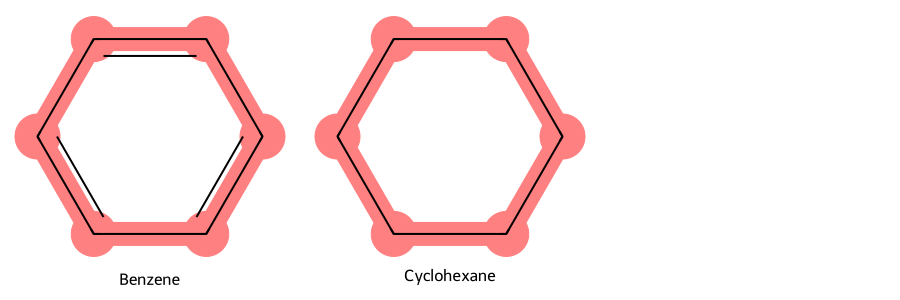

In [59]:
benzene = Chem.MolFromSmiles("c1ccccc1")
cyclohexane = Chem.MolFromSmiles("C1CCCCC1")

MCS_result = rdFMCS.FindMCS([benzene, cyclohexane],
    atomCompare=rdFMCS.AtomCompare.CompareElements,
    bondCompare=rdFMCS.BondCompare.CompareOrder,
    ringMatchesRingOnly=True,
    completeRingsOnly=True,
    #ringCompare = rdFMCS. RingCompare. IgnoreRingFusion,
    #matchValences = True,
    #matchChiralTag=True,
    ) #
# Get the SMARTS pattern of the MCS
mcs_smarts = MCS_result.smartsString
print(f"MCS SMARTS: {mcs_smarts}")

# Convert the SMARTS pattern to an RDKit molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Highlight the MCS in the original molecules
benzene_mcs = benzene.GetSubstructMatch(mcs_mol)
cyclohexane_mcs = cyclohexane.GetSubstructMatch(mcs_mol)

# Draw the molecules with the MCS highlighted
img = Draw.MolsToGridImage(
    [benzene, cyclohexane],
    highlightAtomLists=[benzene_mcs, cyclohexane_mcs],
    legends=["Benzene", "Cyclohexane"],
    subImgSize=(300, 300),
)

img


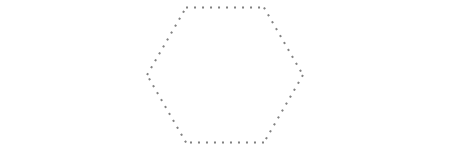

In [60]:
Chem.MolFromSmarts(MCS_result.smartsString)

MCS SMARTS: 


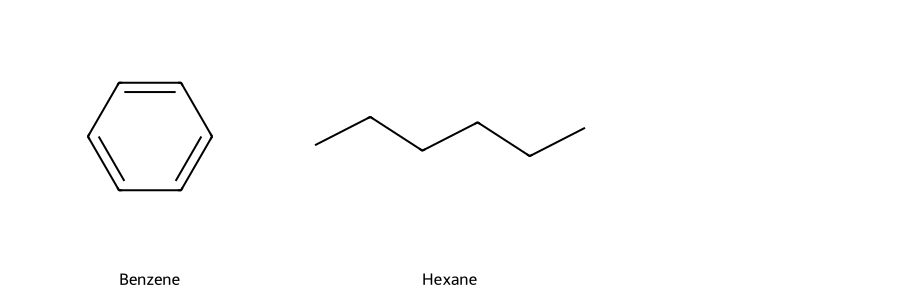

In [61]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# Define the molecules
benzene = Chem.MolFromSmiles("c1ccccc1")
hexane = Chem.MolFromSmiles("CCCCCC")

# Find the MCS with ringMatchesRingOnly=False
MCS_result = rdFMCS.FindMCS(
    [benzene, hexane],
    atomCompare=rdFMCS.AtomCompare.CompareElements,
    bondCompare=rdFMCS.BondCompare.CompareOrder,
    ringMatchesRingOnly=True,  # Allow ring atoms to match non-ring atoms
)

# Get the SMARTS pattern of the MCS
mcs_smarts = MCS_result.smartsString
print(f"MCS SMARTS: {mcs_smarts}")

# Convert the SMARTS pattern to an RDKit molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Highlight the MCS in the original molecules
benzene_mcs = benzene.GetSubstructMatch(mcs_mol)
hexane_mcs = hexane.GetSubstructMatch(mcs_mol)

# Draw the molecules with the MCS highlighted
img = Draw.MolsToGridImage(
    [benzene, hexane],
    highlightAtomLists=[benzene_mcs, hexane_mcs],
    legends=["Benzene", "Hexane"],
    subImgSize=(300, 300),
)

img

MCS SMARTS: 


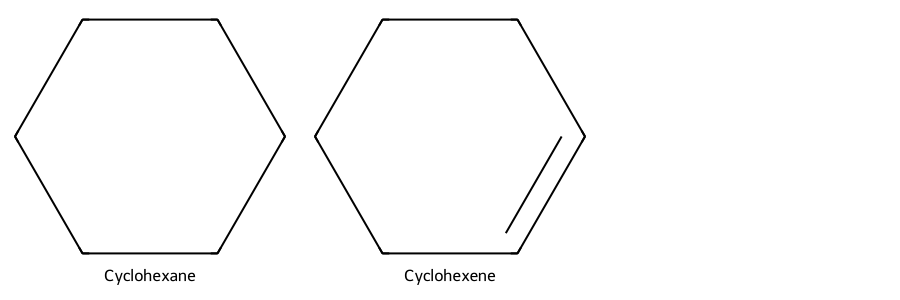

In [62]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

# Define the molecules
cyclohexane = Chem.MolFromSmiles("C1CCCCC1")
cyclohexene = Chem.MolFromSmiles("C1=CCCCC1")

# Find the MCS with ringMatchesRingOnly=False
MCS_result = rdFMCS.FindMCS(
    [cyclohexane, cyclohexene],
    atomCompare=rdFMCS.AtomCompare.CompareElements,
    bondCompare=rdFMCS.BondCompare.CompareOrder,
    ringMatchesRingOnly=True,  # Allow ring atoms to match non-ring atoms
    completeRingsOnly=True
)

# Get the SMARTS pattern of the MCS
mcs_smarts = MCS_result.smartsString
print(f"MCS SMARTS: {mcs_smarts}")

# Convert the SMARTS pattern to an RDKit molecule
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Highlight the MCS in the original molecules
cyclohexane_mcs = cyclohexane.GetSubstructMatch(mcs_mol)
cyclohexene_mcs = cyclohexene.GetSubstructMatch(mcs_mol)

# Draw the molecules with the MCS highlighted
img = Draw.MolsToGridImage(
    [cyclohexane, cyclohexene],
    highlightAtomLists=[cyclohexane_mcs, cyclohexene_mcs],
    legends=["Cyclohexane", "Cyclohexene"],
    subImgSize=(300, 300),
)

img

# Lecture materials

In [63]:
### get the MCS between two molecules -- PAIRWISE
mols = [df[ 'Mol'][0], df['Mol'][1]]
MCS_result = rdFMCS.FindMCS(mols,
    atomCompare=rdFMCS.AtomCompare.CompareElements,
    bondCompare=rdFMCS.BondCompare.CompareOrder,
    ringMatchesRingOnly=True,
    completeRingsOnly=True,
    #ringCompare = rdFMCS. RingCompare. IgnoreRingFusion,
    #matchValences = True,
    #matchChiralTag=True,
    ) #

MCS_result

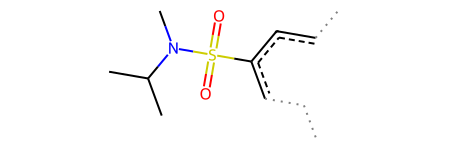

In [64]:
### get the MCS between two molecules -- PAIRWISE
mols = [df[ 'Mol'][0], df['Mol'][1]]
MCS_result2 = rdFMCS.FindMCS(mols) #

Chem.MolFromSmarts(MCS_result2.smartsString)

## Conclusion
Default FindMCS is a mathematical approach, but the hyperparams in the function make it more useable for chemoinformaticians. 

# Bemis-Murco scaffolds
From the molecule:
1. Remove element, chirality and bond type identity
2. Remove sidechain atoms and bonds (only cycle atom/bonds and non-cyclic atom/bonds that
are needed to connect cycles are kept)
### Source: J. Med. Chem. 1996, 39, 2887-2893

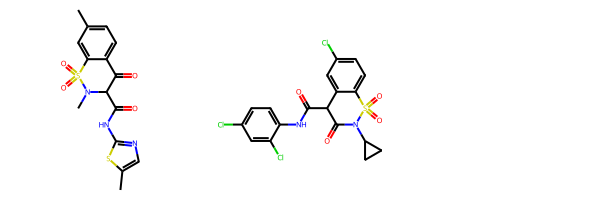

In [65]:
Draw.MolsToGridImage([df[ 'Mol'][0], df[ 'Mol'][1]])

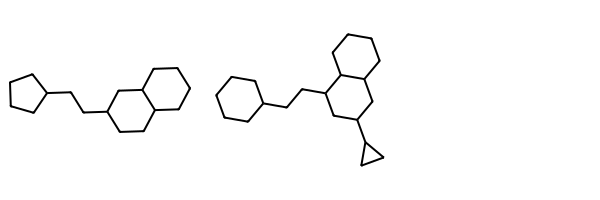

In [66]:
# import module or get the BM scaffolds
from rdkit.Chem.Scaffolds import MurckoScaffold

## Step 1
BM_scaf0 = MurckoScaffold.MakeScaffoldGeneric(df[ 'Mol'][0])
BM_scaf1 = MurckoScaffold.MakeScaffoldGeneric(df[ 'Mol'][1])

## Step 2
BM_scafo_smiles = Chem.MolToSmiles (MurckoScaffold.GetScaffoldForMol(BM_scaf0))
BM_scaf1_smiles = Chem. MolToSmiles(MurckoScaffold.GetScaffoldForMol(BM_scaf1))
BM_scaf0_mol = Chem. MolFromSmiles(BM_scafo_smiles)
BM_scaf1_mol = Chem. MolFromSmiles (BM_scaf1_smiles)
### get the MCS between two molecules
mols = [BM_scaf0_mol, BM_scaf1_mol]
MCS_result_3 = rdFMCS.FindMCS(mols,
    atomCompare=rdFMCS.AtomCompare.CompareElements,
    bondCompare=rdFMCS.BondCompare.CompareOrder,
    # ringMatchesRingOnly=True,
    # completeRingsOnly=True,

    #ringCompare = rdFMCS. RingCompare. IgnoreRingFusion,
    #matchValences = True,
    #matchChiralTag=True,
)
Draw.MolsToGridImage(mols)


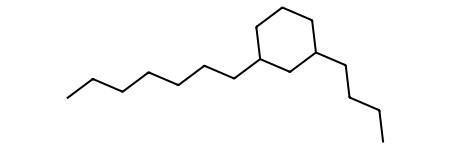

In [67]:
Chem.MolFromSmarts(MCS_result_3.smartsString)

The strictness of the algorithms can be represented by how much common substructure is returned

In [68]:
print(MCS_result.numAtoms) # most strict
print(MCS_result2.numAtoms)
print(MCS_result_3.numAtoms) # least strict

12
15
17


# More demo

In [77]:
# ### make a matrix of substructures
####_WARNING! too long for the demostration
MCSatoms_matrix = np. full( (len(df.index), len(df.index)), -1, dtype = "int64" )
for i in range(0, len(df)):
    for j in range(0, len(df)):
        if (i == j) | (MCSatoms_matrix[i,j] != -1):
            continue
        else:
#
            mols = [df['Mol'][i], df['Mol'][j]]
            MCS_result = rdFMCS.FindMCS(mols,
                atomCompare=rdFMCS.AtomCompare.CompareElements,
                bondCompare=rdFMCS.BondCompare.CompareOrder,
                ringMatchesRingOnly=True,
                completeRingsOnly=True,
                #ringCompare = rdFMCS. RingCompare. IgnoreRingFusion,
                #matchValences = True,
                #matchChiralTag=True,
                ) #
            MCSatoms_matrix[i,j] = MCS_result.numAtoms
            MCSatoms_matrix[j, i] = MCS_result.numAtoms
        if i%5 == 0:
            print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15

In [70]:
1

1